## Problem Set 3 (PHYS512) - Matias Castro Tapia

In [195]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

I defined the routine rk4 step to use the Runge Kutta mthod for integrating diferential equations. Thus:
$$f(x,y)=\frac{dy}{dx}$$
$$k_{1}=hf(x_{n},y_{n})$$
$$k_{2}=hf(x_{n}+h/2,y_{n}+k_{1}/2)$$
$$k_{3}=hf(x_{n}+h/2,y+k_{2}/2)$$
$$k_{4}=hf(x_{n}+h,y_{n}+k_{3})$$
And then:
$$y_{n+1}=y_{n}+k_{1}/6+k_{2}/3+k_{3}/3+k_{4}/6$$
or
$$y(x+h)=y(x)+k_{1}/6+k_{2}/3+k_{3}/3+k_{4}/6$$

In [2]:
def rk4_step(fun,x,y,h):
    k1=h*fun(x,y)
    k2=h*fun(x+(h/2),y+(k1/2))
    k3=h*fun(x+(h/2),y+(k2/2))
    k4=h*fun(x+h,y+k3)
    dy=(k1/6)+(k2/3)+(k3/3)+(k4/6)
    return y+dy

I used rk4_step to solve $\frac{dy}{dx}=\frac{y}{1+x^{2}}$. I defined $h=\frac{20-(-20)}{200}$ because we want to use 200 steps from the initial value $x=-20$ to the last $x=20$ to solve the ODE. Also, $y(-20)=1$ for the boundary condition.

In [237]:
xx=np.linspace(-20,20,201)

In [238]:
def dydx(x,y):
    return y/(1+(x**2))

In [239]:
y0=1
yy=np.ones(len(xx))
h=(xx[-1]-xx[0])/200
yy[0]=y0
for i in range(len(xx)-1):
    yy[i+1]=rk4_step(dydx,xx[i],yy[i],h)

The analyic solution is $y=c0\exp{(\arctan(x))}$. For this case the constant must be $c0=1/\exp(\arctan(-20))$ for our boundary condition.

In [244]:
c0=1/np.exp(np.arctan(-20))

In [245]:
yan=c0*np.exp(np.arctan(xx))

Now comparing the RK4 solution and the analytical:

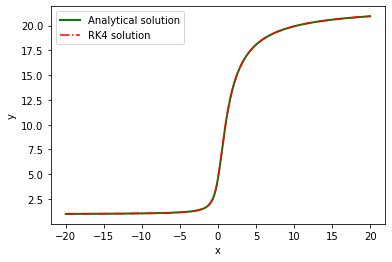

In [252]:
plt.plot(xx,yan,color='green',label='Analytical solution',linewidth=2)
plt.plot(xx,yy,'r-.', label='RK4 solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

I defined the routine rk4_stepd, which uses the rk4_step routine to compute first $y(x+h/2)$, then uses this to compute the following $y$ with another step of $h/2$, then $y(x+h)=y(x+h/2)+RK4_{terms}=y_{2}$. Rigorously, this value should be closer to $y(x+h)=y_{2}+2(\frac{h}{2})^{5}\psi+O(h^{6})$ with $\psi=y^{(5)}/5!$ since RK4 method accuracy is trucated to ignore terms of order $h^{5}$ or higher. 

On the other hand, the routine also compute $y(x+h)=y(x)+RK4_{terms}=y_{1}$, i.e., using a single step of $h$. For this case we will have $y(x+h)=y_{1}+h^{5}\psi+O(h^{6})$. Then, if we substract both expressions for $y(x+h)$ we will have:
$$0=y_{1}-y_{2}+h^{5}\frac{15}{15}$$
$$(y_{2}-y_{1})\frac{16}{15}=h^{5}\psi$$
and replacing in the first expression for $y(x+h)$:
$$y(x+h)=y_{2}+\frac{y_{2}-y_{1}}{15}$$
The routine rk4_stepd returns this final expression. We can note that rk4_step evaluate $f(x,y)$ 4 times to obtain the RK4 terms, while rk4_stepd evaluate $f(x,y)$ 12 times because it uses rk4_step 3 times. Therefore, if we want to use almost the same number of function evaluations in both routines we must use about 66 steps in rk4_stepd.

In [253]:
def rk4_stepd(fun,x,y,h):
    yhalf=rk4_step(fun,x,y,h/2)
    y2=rk4_step(fun,x,yhalf,h/2)
    y1=rk4_step(fun,x,y,h)
    return  y2 + (y2-y1)/15
    #h2=h/2
    #k12=h2*fun(x,y,h2)
    #k22=h2*fun(x+(h2/2),y+(k12/2))
    #k32=h2*fun(x+(h2/2),y+(k22/2))
    #k42=h2*fun(x+h2,y+k32)
    #dy2=(k12/6)+(k22/3)+(k32/3)+(k42/6)
    #yhalf=y+dy2
    

In [272]:
xx2=np.linspace(-20,20,67)

In [273]:
yyy=np.ones(len(xx2))
h2=(xx2[-1]-xx2[0])/66
yyy[0]=y0
for i in range(len(xx2)-1):
    yyy[i+1]=rk4_stepd(dydx,xx2[i],yyy[i],h2)

Comparing both mehods:

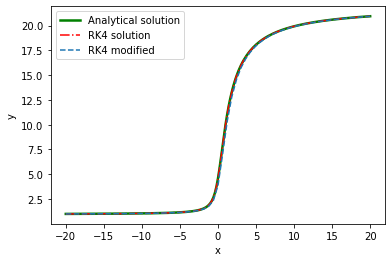

In [274]:
plt.plot(xx,yan,color='green',label='Analytical solution',linewidth=2.5)
plt.plot(xx,yy,'r-.', label='RK4 solution')
plt.plot(xx2,yyy,'--',label='RK4 modified')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [275]:
yan2=c0*np.exp(np.arctan(xx2))

Let's compare the errors too.

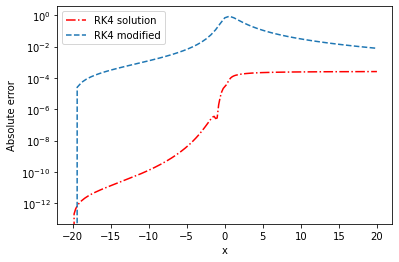

In [277]:
plt.plot(xx,np.abs(yy-yan),'r-.',label='RK4 solution')
plt.plot(xx2,np.abs(yyy-yan2),'--',label='RK4 modified')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Absolute error')
plt.legend()
plt.show()

It seems like the modified method does not make the solution better. However, the errors seem to converge to an error of about $10^{-1}$.

## Problem 3
(Problem 2 is after Problem 3)

I loaded the file with the "dish zenith" data. We can expand the expression for the paraboloid that we want to fit:
$$z-z_{0}=a((x-x_{0})^{2}+(y-y_{0})^{2})$$
$$z=a(x^{2}+y^{2})-2ax_{0}x-2ay_{0}y+a(x_{0}^{2}+y_{0}^{2})+z_{0}$$
Then, we can define new variables $\alpha=a$, $\beta=-2ax_{0}$, $\gamma=-2ay_{0}$, and $\delta=a(x_{0}^{2}+y_{0}^{2})+z_{0}$:
$$z=\alpha(x^{2}+y^{2})+\beta{x}+\gamma{y}+\delta$$
For solving the best-fit parameters we should the best find $m=(\alpha,\beta,\gamma,\delta)$, where the matrix for the model would be (using the row element $A_{i}$):
$A_{i}=((x_{i}^{2}+y_{i}^{2})$ $x_{i}$ $y_{i}$ $1)$. And the least squares solutions should be:

$$m=(A^{T}A)^{-1}A^{T}z$$



In [281]:
dat=np.loadtxt('dish_zenith.txt')

In [282]:
xd=np.array([i[0] for i in dat])
yd=np.array([i[1] for i in dat])
zd=np.array([i[2] for i in dat])

In [283]:
mat=np.ones([len(xd),4])
for i in range(len(xd)):
    mat[i]=([xd[i]**2+yd[i]**2,xd[i],yd[i],1])

$$m=(A^{T}A)^{-1}A^{T}z$$

In [284]:
m=np.linalg.inv(mat.T@mat)@mat.T@zd

In [35]:
m

array([ 1.66704455e-04,  4.53599028e-04, -1.94115589e-02, -1.51231182e+03])

Now, we have to obtain the old parameters $a$, $x_{0}$, $y_{0}$, and $z_{0}$

In [285]:
a=m[0]
x0=-m[1]/(2*m[0])
y0=-m[2]/(2*m[0])
z0=m[3]-(x0**2+y0**2)*a

In [286]:
a,x0,y0,z0

(0.0001667044547740132,
 -1.3604886221978416,
 58.22147608157977,
 -1512.877210036787)

Due to (x,y,z) in the data are in mm we can estimate the focal length in meters as $\frac{(1/4a)}{1000}$

In [287]:
f=(1/(4*m[0]))/1000 #in meters

In [289]:
f

1.4996599841252194

We are going to define the error in the data comparing the fit with the data $\sigma_{i}=|z_{i}-(Am)_{i}|$

In [290]:
sig2=np.abs(zd-(mat@m))**2

I defined the noise matrix $N$ using $\sigma_{i}^{2}$ as elements of a diagonal matrix

In [291]:
Nnn=np.zeros([len(zd),len(zd)])
for i in range(len(zd)):
    Nnn[i][i]=sig2[i]

Now, the square errors in the best-fit parameters would be the diagonal of $(A^{T}N^{-1}A)^{-1}$ 

In [297]:
errors2=np.diag(np.linalg.inv(mat.T@np.linalg.pinv(Nnn)@mat))

In [298]:
errors2

array([4.08048563e-18, 1.18646669e-11, 1.57044668e-11, 3.10090531e-05])

In [299]:
errorm=np.sqrt(errors2)

In [300]:
errorm

array([2.02002120e-09, 3.44451258e-06, 3.96288618e-06, 5.56857729e-03])

And the error in the focal length should be $\Delta{f}=(|\frac{df}{da}|\Delta{a})$ with $\Delta{a}=\sigma_{a}$ and $\Delta{f}=\sigma_{f}$. Considering $|\frac{df}{da}|=\frac{1}{4a^{2}}$

In [304]:
errorf=errorm[0]/(4*(a**2))

we have to multiply by (1/1000) to have the result in meters.

In [306]:
errorf/1000

1.8171949618123915e-05

In [308]:
np.abs(f-1.5)

0.00034001587478060813

Comparing what I obtained 1.4996599841252194 meters with the expected value 1.5 meters we have a difference of about $10^{-4}$ which is one order of magnitude larger than the error we estimated.

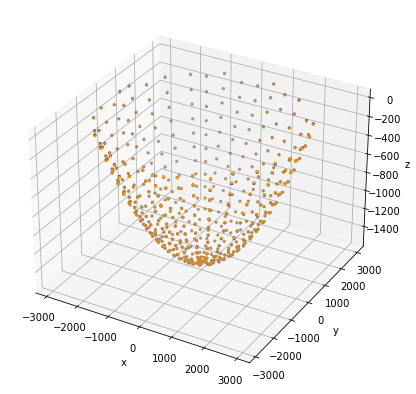

In [328]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.plot_surface(xd,yd,mat@m,marker='.',cmap='Oranges')
ax.scatter(xd,yd,mat@m,marker='.',color='orange')
ax.scatter(xd, yd, zd, marker='.',color='navy')

## Problem 2

I defined an array with all the half-lifes=th=$t_{1/2}$ in the order of $Pb_{206}$ to $U_{238}$. They are in years.

In [331]:
th=np.array([138.376*0.00274,5.015,22.3,164.3*(3.171e-14),19.9*(1.903e-6),
            26.8*(1.903e-6),3.10*(1.903e-6),3.82535*0.00274,1600,75380,
            245500,6.70*(0.000114),24.10*0.00274,4.468*(1e9)])

In [332]:
th

array([3.7915024e-01, 5.0150000e+00, 2.2300000e+01, 5.2099530e-12,
       3.7869700e-05, 5.1000400e-05, 5.8993000e-06, 1.0481459e-02,
       1.6000000e+03, 7.5380000e+04, 2.4550000e+05, 7.6380000e-04,
       6.6034000e-02, 4.4680000e+09])

Then, ll=$\lambda$ are the decay constants and are related to the half-lifes as $\lambda=\ln{(2)}/t_{1/2}$ 

In [333]:
ll=(np.log(2)*np.ones(len(th))/th)

In [334]:
ll

array([1.82815968e+00, 1.38214792e-01, 3.10828332e-02, 1.33042886e+11,
       1.83034769e+04, 1.35910146e+04, 1.17496513e+05, 6.61307916e+01,
       4.33216988e-04, 9.19537252e-06, 2.82341010e-06, 9.07498273e+02,
       1.04968226e+01, 1.55135895e-10])

In [113]:
ll[::-1]

array([1.55135895e-10, 1.04968226e+01, 9.07498273e+02, 2.82341010e-06,
       9.19537252e-06, 4.33216988e-04, 6.61307916e+01, 1.17496513e+05,
       1.35910146e+04, 1.83034769e+04, 1.33042886e+11, 3.10828332e-02,
       1.38214792e-01, 1.82815968e+00])

I defined the routine ff to introduce the ODEs related to the decay of the elements from $U_{238}$ to $Pb_{206}$. Then, every dndt in the routine are similar to the intermediate elements and just decay for $U_{238}$ and just increase in the stable $Pb_{206}$:

$$\frac{dN_{U_{238}}}{dt}=-\lambda_{U_{238}}N_{U_{238}}$$
$$\frac{dN_{Th_{234}}}{dt}=-\lambda_{Th_{234}}N_{Th_{234}}+\lambda_{U_{238}}N_{U_{238}}$$
$$\frac{dN_{Pa_{234}}}{dt}=-\lambda_{Pa_{234}}N_{Pa_{234}}+\lambda_{Th_{234}}N_{Th_{234}}$$
$$...$$
$$\frac{dN_{Pb_{206}}}{dt}=\lambda_{Po_{210}}N_{Po_{210}}$$

In the input of the routine I fixed l=ll[::-1] because the half-lifes and the constant were in the order from $Pb_{206}$ to $U_{238}$, while the equations were fixed as described above.

In [335]:
def ff(t,n,l=ll[::-1]):
    dndt=np.zeros(len(l)+1)
    dndt[0]=-l[0]*n[0]
    for i in range(1,len(l)):
        dndt[i]=-l[i]*n[i]+l[i-1]*n[i-1]
    dndt[len(l)]=l[len(l)-1]*n[len(l)-1]
    return dndt
    #dndt[1]=-l[1]n[1]+l[0]n[0]

We must define that the fraction of $U_{238}$ should be 1 for the initial time and 0 for the other elements.

In [336]:
n0=np.array([1]+[0]*len(ll))

In [337]:
n0

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

t0 is the array with the integration time from $0$ to $10^{10}$.

In [230]:
t0=[0,1e10]

I used the implicit method of integration of integrate.solve_ivp from scipy since the time interval of integration is very large.

In [338]:
from scipy import integrate

In [340]:
ans_stiff=integrate.solve_ivp(ff,t0,n0,method='Radau')

ans_stiff.t are the time steps used in the integration, while ans_stiff.y are the solution for every $N$.

In [341]:
ans_stiff.t

array([0.00000000e+00, 2.02507037e+00, 2.22757741e+01, 2.24782811e+02,
       2.24985318e+03, 2.25005569e+04, 2.25007594e+05, 6.51844652e+05,
       1.48408887e+06, 2.75857217e+06, 5.54151454e+06, 1.59917738e+07,
       8.64570005e+07, 7.91109268e+08, 3.88581261e+09, 8.58372893e+09,
       1.00000000e+10])

In [342]:
ans_stiff.y

array([[1.00000000e+00, 1.00000000e+00, 9.99999997e-01, 9.99999965e-01,
        9.99999651e-01, 9.99996509e-01, 9.99965094e-01, 9.99898881e-01,
        9.99769791e-01, 9.99572138e-01, 9.99140682e-01, 9.97522177e-01,
        9.86676964e-01, 8.84502937e-01, 5.47262098e-01, 2.64048082e-01,
        2.11964064e-01],
       [0.00000000e+00, 1.38562853e-11, 1.47672959e-11, 1.47793023e-11,
        1.47793144e-11, 1.47792680e-11, 1.47788037e-11, 1.47778251e-11,
        1.47759173e-11, 1.47729961e-11, 1.47666195e-11, 1.47426991e-11,
        1.45824142e-11, 1.30723516e-11, 8.08816146e-12, 3.90245099e-12,
        3.13268464e-12],
       [0.00000000e+00, 1.60150743e-13, 1.70808268e-13, 1.70948768e-13,
        1.70948911e-13, 1.70948374e-13, 1.70943003e-13, 1.70931684e-13,
        1.70909616e-13, 1.70875828e-13, 1.70802071e-13, 1.70525389e-13,
        1.68671411e-13, 1.51204867e-13, 9.35538923e-14, 4.51387478e-14,
        3.62350385e-14],
       [0.00000000e+00, 3.00143853e-10, 3.44072632e-09, 3.484

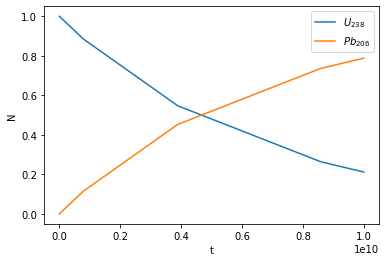

In [347]:
plt.plot(ans_stiff.t,ans_stiff.y[0],label='$U_{238}$')
plt.plot(ans_stiff.t,ans_stiff.y[-1],label='$Pb_{206}$')
plt.xlabel('t')
plt.ylabel('N')
plt.legend()
plt.show()

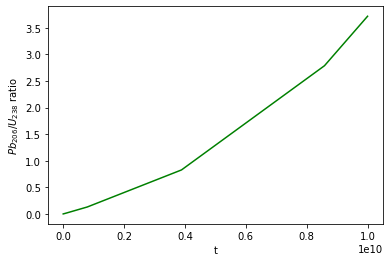

In [349]:
plt.plot(ans_stiff.t,ans_stiff.y[-1]/ans_stiff.y[0],'g')
plt.xlabel('t')
plt.ylabel('$Pb_{206}/U_{238}$ ratio')
plt.show()

It makes sense that the $Pb_{206}$ increases almost at the same rate of the $U_{238}$ decay because all the intermediate elements decay quicker than $U_{238}$. We can see in the plot of $Pb_{206}/U_{238}$ ratio that almost at $0.5\times10^{10}$ years the amount of $Pb_{206}$ have been increased until the same value of $U_{238}$, i.e, $Pb_{206}/U_{238}\sim 1$; this also makes sense since the half-life of $U_{238}$ is about $t_{1/2}\sim0.5\times10^{10}$

Now we can see the ratio of $U_{234}$ and $Th_{230}$.

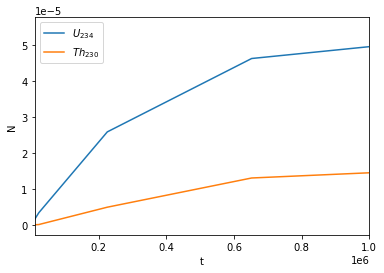

In [353]:
plt.plot(ans_stiff.t,ans_stiff.y[3],label='$U_{234}$')
plt.plot(ans_stiff.t,ans_stiff.y[4],label='$Th_{230}$')
plt.xlabel('t')
plt.ylabel('N')
#plt.yscale('log')
plt.xlim(10**4,10**6)
plt.legend()
plt.show()

C:\Users\Odette\AppData\Local\Temp\ipykernel_5516\1670163967.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ans_stiff.t,ans_stiff.y[3]/ans_stiff.y[4],'g')


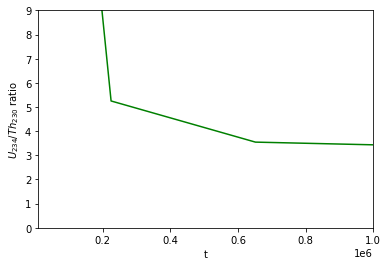

In [358]:
plt.plot(ans_stiff.t,ans_stiff.y[3]/ans_stiff.y[4],'g')
plt.xlabel('t')
plt.ylabel('$U_{234}/Th_{230}$ ratio')
plt.xlim(10**4,10**6)
plt.ylim(0,9)
plt.show()

We can see that the $U_{234}$ is reduced while the $Th_{230}$ increases. Then for smaller ratios of $U_{234}/Th_{230}$ the rocks will be older. 